In [1]:
% matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

# Data reading

In [2]:
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


# Y-view pattern recognition. 1&2 stations.

### modify_for_yz_analysis

In [3]:
from Y_views import *
event_id = 2
event = all_hits[all_hits['event'] == event_id]

event = modify_for_yz_analysis_1_2(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
79,79,73.361366,0.837755,2581.149902,2,383.880371,1,0,0,0,284,0.042245,2,38,0.8686,2581.15
41,41,64.405243,3.918991,2582.247559,3,383.923828,1,0,0,1,283,0.398998,2,0,3.5086,2582.25
42,42,64.391327,3.927866,2583.750244,3,383.967041,1,0,1,0,282,0.032134,2,1,3.9486,2583.75
80,80,73.391182,0.832995,2583.750732,2,383.973724,1,0,1,0,284,0.392995,2,39,0.4286,2583.75
48,48,64.137390,4.091341,2611.151855,3,384.884766,1,3,0,0,282,0.308665,2,7,4.3886,2611.15
85,85,73.705360,0.782221,2611.149902,2,384.881409,1,3,0,0,284,0.097779,2,44,0.8686,2611.15
49,49,64.113304,4.106993,2613.749023,3,384.968506,1,3,1,0,282,0.146996,2,8,3.9486,2613.75
86,86,73.735184,0.777356,2613.750732,2,384.972351,1,3,1,0,284,0.337356,2,45,0.4286,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
50,50,62.551594,5.195495,2782.250488,3,390.588989,2,0,0,1,282,0.084507,2,9,5.2686,2782.25


In [4]:
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
79,79,73.361366,0.837755,2581.149902,2,383.880371,1,0,0,0,284,0.042245,2,38,0.8686,2581.15
80,80,73.391182,0.832995,2583.750732,2,383.973724,1,0,1,0,284,0.392995,2,39,0.4286,2583.75
85,85,73.705360,0.782221,2611.149902,2,384.881409,1,3,0,0,284,0.097779,2,44,0.8686,2611.15
86,86,73.735184,0.777356,2613.750732,2,384.972351,1,3,1,0,284,0.337356,2,45,0.4286,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
88,88,75.667488,0.437574,2782.250977,2,390.597870,2,0,0,1,285,0.437575,2,47,-0.0114,2782.25
89,89,75.684669,0.434236,2783.750000,2,390.638794,2,0,1,0,284,0.005764,2,48,0.4286,2783.75
96,96,76.011482,0.369193,2812.250732,2,391.595184,2,3,0,1,285,0.369194,2,55,-0.0114,2812.25
97,97,76.028702,0.365713,2813.749756,2,391.639740,2,3,1,0,284,0.074288,2,56,0.4286,2813.75


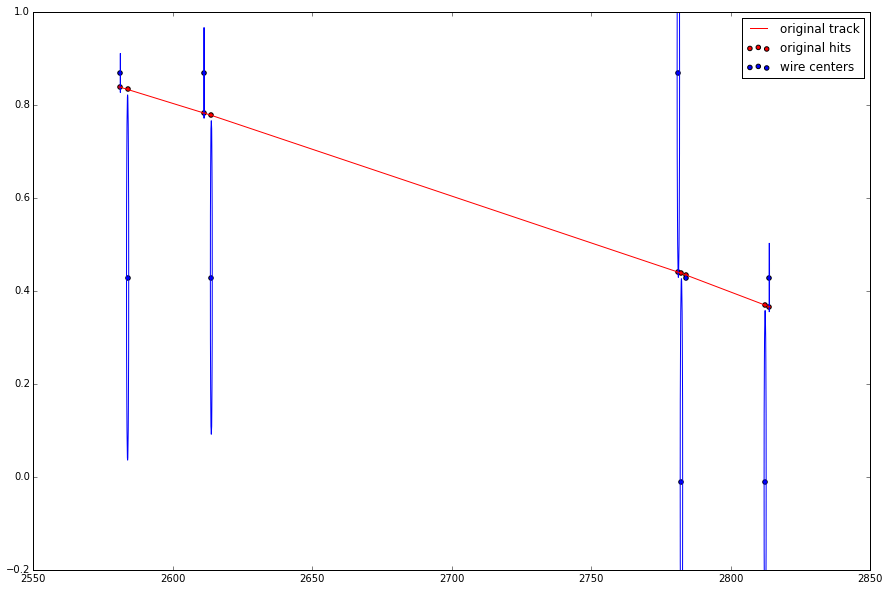

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)


plt.legend(loc='best')
plt.show()

### conventor_yz

In [6]:
hits = conventor_yz(event, 0)
hits

{2581.1500000000001: [<Y_views.ParametresYZ instance at 0x1084f1f38>],
 2582.25: [<Y_views.ParametresYZ instance at 0x108d6eab8>],
 2583.75: [<Y_views.ParametresYZ instance at 0x108d6e320>,
  <Y_views.ParametresYZ instance at 0x1084e5a28>],
 2611.1500000000001: [<Y_views.ParametresYZ instance at 0x1084e5518>,
  <Y_views.ParametresYZ instance at 0x1084e5b00>],
 2613.75: [<Y_views.ParametresYZ instance at 0x105ef1b90>,
  <Y_views.ParametresYZ instance at 0x105ef1710>],
 2781.1500000000001: [<Y_views.ParametresYZ instance at 0x105ef1a70>],
 2782.25: [<Y_views.ParametresYZ instance at 0x105ef1ab8>,
  <Y_views.ParametresYZ instance at 0x1084afa28>],
 2783.75: [<Y_views.ParametresYZ instance at 0x1084af3b0>],
 2784.8499999999999: [<Y_views.ParametresYZ instance at 0x105fd35f0>],
 2812.25: [<Y_views.ParametresYZ instance at 0x1051afab8>,
  <Y_views.ParametresYZ instance at 0x1051af248>],
 2813.75: [<Y_views.ParametresYZ instance at 0x1084ab290>,
  <Y_views.ParametresYZ instance at 0x1084abd40

### points_crossing_line_yz

In [7]:
z1 = track.Wz.min()
z2 = track.Wz.max()
y1 = track.Wy.min()
y2 = track.Wy.max()

plane_k = (y2 - y1) / (z2 - z1)
plane_b = y1 - plane_k * z1
plane_width = 0.85
n_min = 7



_, crossing_points, lin_regr = points_crossing_line_yz(plane_k, plane_b, plane_width, hits, n_min)

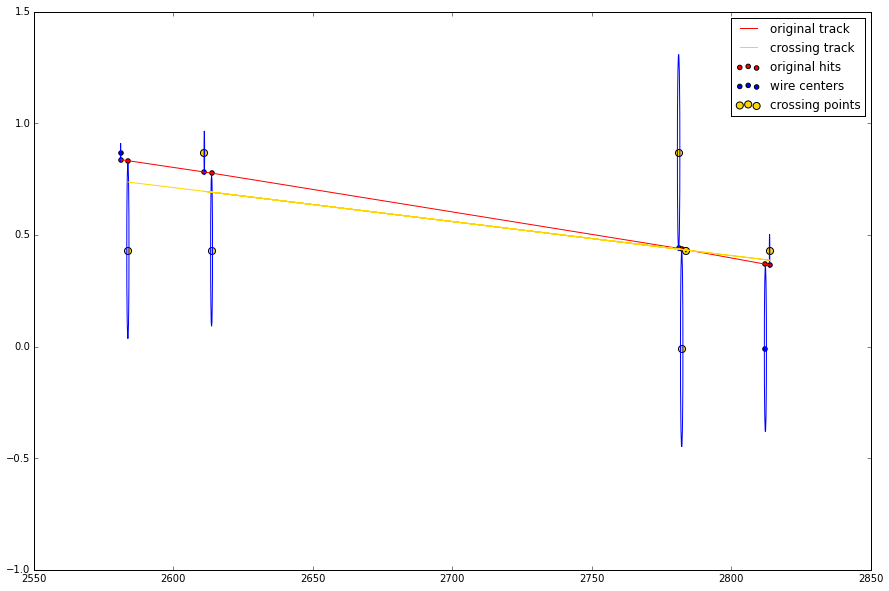

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# crossing point
Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

### loop_yz

In [9]:
tracks, linking_table = loop_yz(event, 7, 0.87, 0)

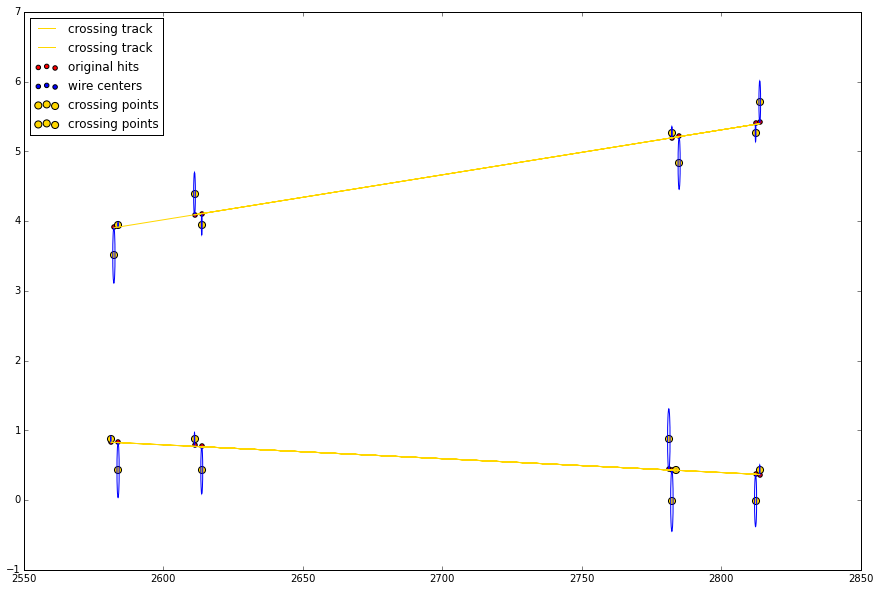

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = event.Wz.values
Wy = event.Wy.values
Z = event.Z.values
Y = event.Y.values
R = event.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# loop_yz
for key in linking_table:
    
    crossing_points = linking_table[key]
    lin_regr = tracks[key
                     ]
    Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
    Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
    Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Y-view pattern recognition. 1&2 stations.

### modify_for_xz_analysis_1_2

In [11]:
from UV_views import *
event_id = 2
event2 = all_hits[all_hits['event'] == event_id]

event2 = modify_for_xz_analysis_1_2(event2)
event2

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,event,k,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz
43,43,64.312538,3.978246,2592.249268,3,384.251007,1,1,0,1,...,2,2,-1.7714,-250,250,-248.894287,249.203062,-23.553595,20.024276,2592.3793
81,81,73.488625,0.817361,2592.249023,2,384.254303,1,1,0,1,...,2,40,-5.2914,-250,250,-248.587499,249.509850,-27.060200,16.517671,2592.3793
44,44,64.298607,3.987181,2593.752197,3,384.304443,1,1,1,0,...,2,3,-1.3314,-250,250,-248.932635,249.164714,-23.115269,20.462602,2593.8793
82,82,73.518448,0.812549,2594.850342,2,384.337860,1,1,1,1,...,2,41,-5.7314,-250,250,-248.549150,249.548199,-27.498526,16.079345,2594.9793
45,45,64.230087,4.031287,2601.150391,3,384.547607,1,2,0,0,...,2,4,9.6686,-250,250,-248.206001,249.891349,31.420744,-12.157128,2601.2793
83,83,73.603310,0.798823,2602.250244,2,384.585205,1,2,0,1,...,2,42,7.0286,-250,250,-248.436092,249.661257,28.790790,-14.787082,2602.3793
46,46,64.206024,4.046875,2603.748047,3,384.640503,1,2,1,0,...,2,5,9.2286,-250,250,-248.244349,249.853000,30.982418,-12.595453,2603.8793
84,84,73.620506,0.796033,2603.749756,2,384.636932,1,2,1,0,...,2,43,7.4686,-250,250,-248.397743,249.699606,29.229115,-14.348756,2603.8793
47,47,64.195793,4.053535,2604.852783,3,384.686462,1,2,1,1,...,2,6,10.1086,-250,250,-248.167652,249.929697,31.859069,-11.718802,2604.9793
90,90,75.769470,0.417660,2791.149902,2,390.885681,2,1,0,0,...,2,49,-6.1714,-250,250,-248.510802,249.586547,-27.936852,15.641020,2791.2793


In [12]:
track2 = event2[event2.TrackID == 3]
track2

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,event,k,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz
43,43,64.312538,3.978246,2592.249268,3,384.251007,1,1,0,1,...,2,2,-1.7714,-250,250,-248.894287,249.203062,-23.553595,20.024276,2592.3793
44,44,64.298607,3.987181,2593.752197,3,384.304443,1,1,1,0,...,2,3,-1.3314,-250,250,-248.932635,249.164714,-23.115269,20.462602,2593.8793
45,45,64.230087,4.031287,2601.150391,3,384.547607,1,2,0,0,...,2,4,9.6686,-250,250,-248.206001,249.891349,31.420744,-12.157128,2601.2793
46,46,64.206024,4.046875,2603.748047,3,384.640503,1,2,1,0,...,2,5,9.2286,-250,250,-248.244349,249.853000,30.982418,-12.595453,2603.8793
47,47,64.195793,4.053535,2604.852783,3,384.686462,1,2,1,1,...,2,6,10.1086,-250,250,-248.167652,249.929697,31.859069,-11.718802,2604.9793
52,52,62.458839,5.266340,2792.251465,3,390.923767,2,1,0,1,...,2,11,-0.0114,-250,250,-249.047681,249.049668,-21.800292,21.777579,2792.3793
53,53,62.434761,5.284913,2794.847900,3,391.011566,2,1,1,1,...,2,12,-0.4514,-250,250,-249.009332,249.088017,-22.238618,21.339253,2794.9793
54,54,62.366196,5.338003,2802.248779,3,391.257202,2,2,0,1,...,2,13,10.5486,-250,250,-248.129303,249.968046,32.297395,-11.280476,2802.3793
55,55,62.352272,5.348852,2803.751465,3,391.308044,2,2,1,0,...,2,14,10.9886,-250,250,-248.090955,250.006394,32.735721,-10.842151,2803.8793


### get_xz

In [13]:
[plane_k, plane_b] = np.polyfit(track2.Z.values, track2.Y.values, 1)

int_hits = get_xz(plane_k, plane_b, track2)
int_hits

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz,Wy,Wx
43,43,64.312538,3.978246,2592.249268,3,384.251007,1,1,0,1,...,-1.7714,-250,250,-248.894287,249.203062,-23.553595,20.024276,2592.3793,3.975558,65.765373
44,44,64.298607,3.987181,2593.752197,3,384.304443,1,1,1,0,...,-1.3314,-250,250,-248.932635,249.164714,-23.115269,20.462602,2593.8793,3.985276,60.828019
45,45,64.230087,4.031287,2601.150391,3,384.547607,1,2,0,0,...,9.6686,-250,250,-248.206001,249.891349,31.420744,-12.157128,2601.2793,4.033220,64.834831
46,46,64.206024,4.046875,2603.748047,3,384.640503,1,2,1,0,...,9.2286,-250,250,-248.244349,249.853000,30.982418,-12.595453,2603.8793,4.050065,59.593858
47,47,64.195793,4.053535,2604.852783,3,384.686462,1,2,1,1,...,10.1086,-250,250,-248.167652,249.929697,31.859069,-11.718802,2604.9793,4.057192,69.609267
52,52,62.458839,5.266340,2792.251465,3,390.923767,2,1,0,1,...,-0.0114,-250,250,-249.047681,249.049668,-21.800292,21.777579,2792.3793,5.271326,60.382338
53,53,62.434761,5.284913,2794.847900,3,391.011566,2,1,1,1,...,-0.4514,-250,250,-249.009332,249.088017,-22.238618,21.339253,2794.9793,5.288171,65.623311
54,54,62.366196,5.338003,2802.248779,3,391.257202,2,2,0,1,...,10.5486,-250,250,-248.129303,249.968046,32.297395,-11.280476,2802.3793,5.336115,60.039539
55,55,62.352272,5.348852,2803.751465,3,391.308044,2,2,1,0,...,10.9886,-250,250,-248.090955,250.006394,32.735721,-10.842151,2803.8793,5.345833,64.976893


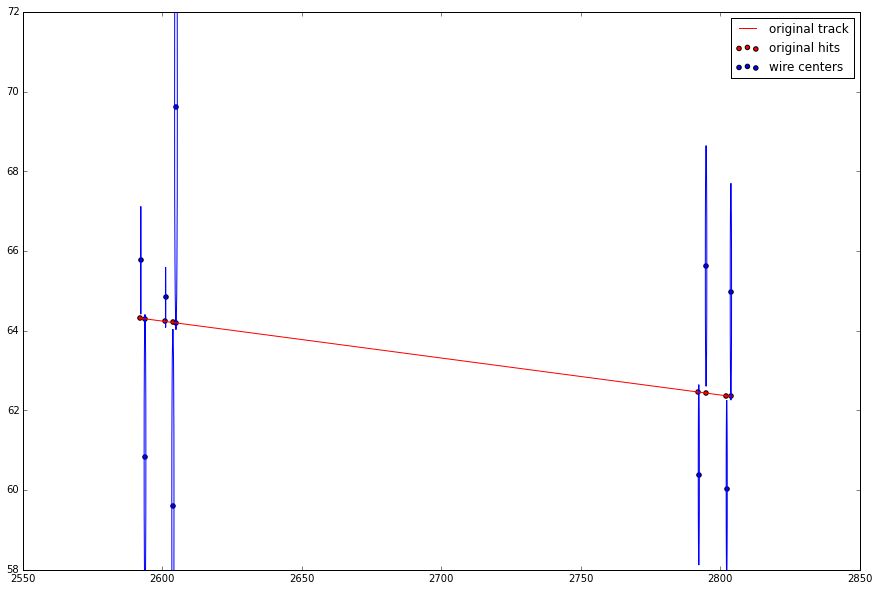

In [14]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

### conventor_xz

In [15]:
hits2 = conventor_xz(track2, 0)
hits2

{2592.3793000000001: {43: <UV_views.parametresXZ instance at 0x1090054d0>},
 2593.8793000000001: {44: <UV_views.parametresXZ instance at 0x1084ab6c8>},
 2601.2793000000001: {45: <UV_views.parametresXZ instance at 0x1084ab758>},
 2603.8793000000001: {46: <UV_views.parametresXZ instance at 0x1084f2a70>},
 2604.9793: {47: <UV_views.parametresXZ instance at 0x1084f2518>},
 2792.3793000000001: {52: <UV_views.parametresXZ instance at 0x105f6a320>},
 2794.9793: {53: <UV_views.parametresXZ instance at 0x105f6a518>},
 2802.3793000000001: {54: <UV_views.parametresXZ instance at 0x105f09c20>},
 2803.8793000000001: {55: <UV_views.parametresXZ instance at 0x105f45170>}}

### points_crossing_line_xz

In [16]:
intersecting_hits = {}
tmp = {}

k = plane_k
b = plane_b

hits_xz = get_xz(k, b, track2)

# TODO: the loop optimization
for z in hits2:

    y = k * z + b

    for hit_index in hits2[z]:

        x = hits_xz.loc[[hit_index]].Wx.values[0]

        if ((x > -250) & (x < 250) & (not hits2[z][hit_index].used)):

            hits2[z][hit_index].x = x
            tmp[hit_index] = x
            intersecting_hits.setdefault(z, []).append(hit_index)

In [17]:
[k, b] = np.polyfit(track2.Z.values, track2.X.values, 1)

_, crossing_points2, lin_regr2 = points_crossing_line_xz(k, b, 15, hits2, intersecting_hits, 6)

crossing_points2, lin_regr2

([43, 45, 44, 47, 46, 54, 55, 52, 53],
 array([ -6.59254734e-03,   8.12363597e+01]))

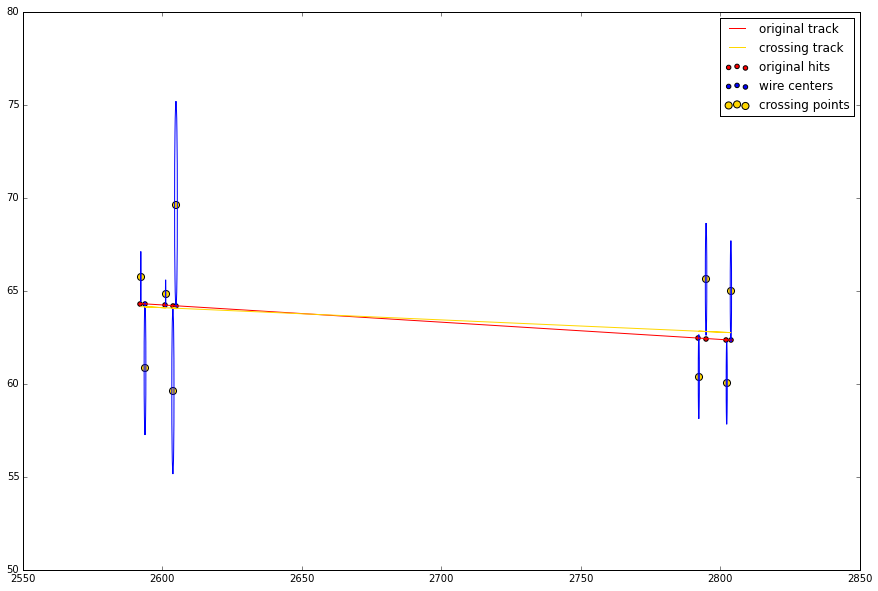

In [18]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# crossing point
Z_crossing = np.array([int_hits.loc[i].Wz for i in crossing_points2])
X_crossing = np.array([int_hits.loc[i].Wx for i in crossing_points2])
X_line_crossing = Z_crossing * lin_regr2[0] + lin_regr2[1]

plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')


plt.legend(loc='best')
plt.show()

### loop_xz

In [19]:
new_tracks, new_linking_table, x_coordinates = loop_xz(event2, tracks, linking_table, 6, 10, 0)

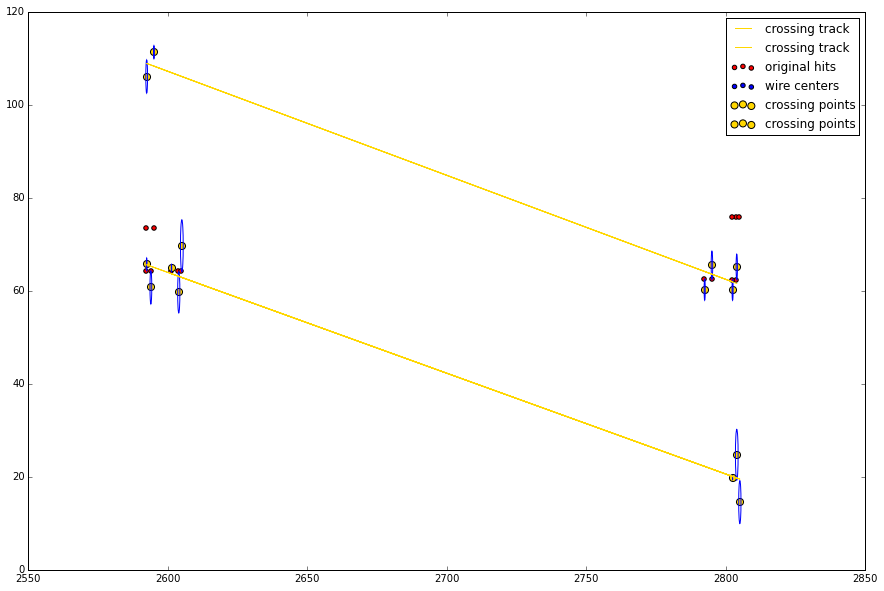

In [20]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[1]]
Wx = [x_coordinates[i] for i in new_linking_table.values()[0]] + \
     [x_coordinates[i] for i in new_linking_table.values()[1]] 
Z = [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[1]]
X = [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[1]]

R = np.array([event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[1]]) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(len(Z),))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, len(Wz)):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# loop_yz
for key in new_linking_table:
    
    crossing_points = new_linking_table[key]
    lin_regr = new_tracks[key]
    Z_crossing = np.array([event2.loc[i].Wz for i in crossing_points])
    X_crossing = np.array([x_coordinates[i] for i in crossing_points])
    X_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

In [21]:
def loop_xz(event, tracks, linking_table, n_min, width, ind):
    """
    Gets tracks and linking_table received from previous stage Y-views analysis. Fetches only tracks which intersect 
    more than n_min hits in 2d-space (z, x). Every track may be rejected or give 1 and more tracks in 2d-space (z, x).
    
    Args:
        event: pd.DataFrame() with all hits of any event;
        n_min: minimal number of points intercepting track for recognition this track;
        plane_width: stereo window of finding line;
        tracks: all tracks recognized on previous stage;
        linking_table: table from previous stage.
    Returns:
        new_tracks: new dictionary, key in new_tracks = "key from 'tracks'" * 10000 + new key, for cases when one track from
            'tracks' contains 2 and more tracks in 3d-space;
        new_linking_table: links each track from new_tracks and his hits, represented by dictionary:
            key = id of track, value = array of indexes of his hits.
    """

    hits = conventor_xz(event, ind)

    new_linking_table = {}
    new_tracks = {}

    x_coordinates = {}
    tmp = {}
    new_trackID = 1


    if (ind):

        start_zs = [3331.2793, 3332.3793]
        end_zs = [3544.9793, 3543.8793]

    else:

        start_zs = [2591.2793, 2592.3793]
        end_zs = [2803.8793, 2804.9793]


    if (ind):

        event = modify_for_xz_analysis_3_4(event)

    else:

        event = modify_for_xz_analysis_1_2(event)


    hh = []
    for track_id in tracks:

        intersecting_hits = {}
        n = 0

        k = tracks[track_id][0]
        b = tracks[track_id][1]

        hits_xz = get_xz(k, b, event)
        hh.append(hits_xz.copy())

        # TODO: the loop optimization
        for z in hits:

            y = k * z + b

            for hit_index in hits[z]:

                x = hits_xz.loc[[hit_index]].Wx.values[0]

                if ((x > -250) & (x < 250) & (not hits[z][hit_index].used)):

                    hits[z][hit_index].x = x
                    tmp[hit_index] = x
                    intersecting_hits.setdefault(z, []).append(hit_index)
                    n += 1

        if (n >= n_min):

            for start_z in (set(start_zs) & set(intersecting_hits)):

                for i in intersecting_hits[start_z]:

                    for end_z in (set(end_zs) & set(intersecting_hits)):

                        for j in intersecting_hits[end_z]:

                            if ((not hits[start_z][i].used) & (not hits[end_z][j].used)):

                                new_k, new_b = get_plane((hits[start_z][i].x, start_z), (hits[end_z][j].x, end_z))

                                indicator, crossing_points, lin_regr = \
                                    points_crossing_line_xz(new_k, new_b, width, hits, intersecting_hits, n_min)

                                if indicator == 1:

                                    new_tracks[track_id * 10000 + new_trackID] = lin_regr
                                    new_linking_table[track_id * 10000 + new_trackID] = crossing_points

                                    for k in crossing_points:
                                        x_coordinates[k] = tmp[k]

                                    new_trackID += 1


    return new_tracks, new_linking_table, x_coordinates, hh

new_tracks, new_linking_table, x_coordinates, hh = loop_xz(event2, tracks, linking_table, 9, 15, 0)

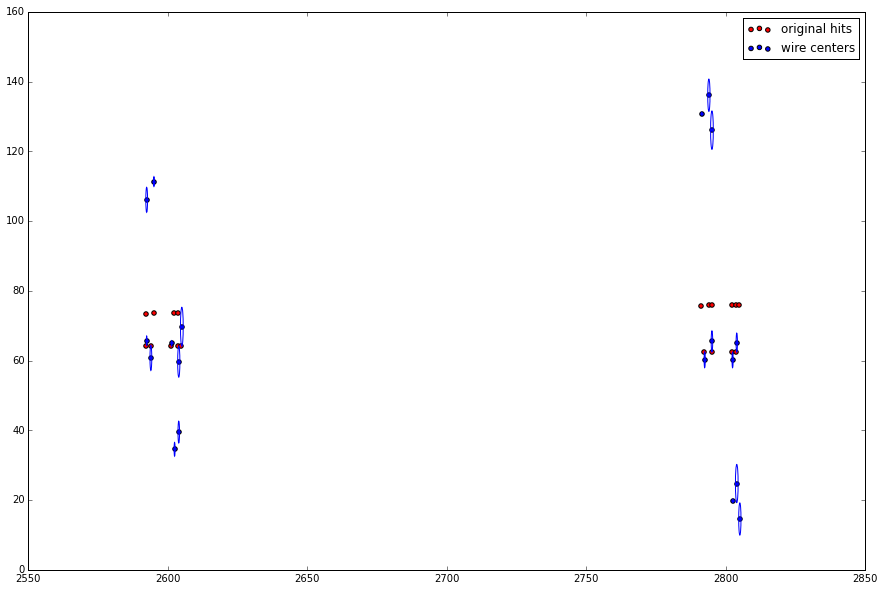

In [22]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = hh[0].Wz.values
Wx = hh[0].Wx.values
Z = event2.Z.values
X = event2.X.values
R = (hh[0].dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Wz.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Wz.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

# Y-view pattern recognition. 3&4 stations.

### modify_for_yz_analysis

In [23]:
from Y_views import *
event_id = 2
event = all_hits[all_hits['event'] == event_id]

event = modify_for_yz_analysis_3_4(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
58,58,57.558144,10.965934,3321.156982,3,408.579224,3,0,0,0,278,0.474116,2,17,11.4286,3321.15
59,59,57.548088,10.981816,3322.243896,3,408.611115,3,0,0,1,279,0.421861,2,18,10.5486,3322.25
98,98,81.869873,-1.444798,3322.251465,2,408.606445,3,0,0,1,286,0.315205,2,57,-1.7714,3322.25
60,60,57.534149,11.003839,3323.750000,3,408.653229,3,0,1,0,278,0.003839,2,19,10.9886,3323.75
99,99,81.887085,-1.452010,3323.749268,2,408.653168,3,0,1,0,285,0.132011,2,58,-1.3314,3323.75
66,66,57.279995,11.408733,3351.150391,3,409.567413,3,3,0,0,278,0.031270,2,25,11.4286,3351.15
104,104,82.214432,-1.590673,3352.250732,2,409.604370,3,3,0,1,286,0.169329,2,63,-1.7714,3352.25
67,67,57.255859,11.447518,3353.743408,3,409.663696,3,3,1,0,278,0.447569,2,26,10.9886,3353.75
105,105,82.231628,-1.598032,3353.748535,2,409.656219,3,3,1,0,285,0.278036,2,64,-1.3314,3353.75
68,68,57.245502,11.464171,3354.856201,3,409.698792,3,3,1,1,278,0.415875,2,27,11.8686,3354.85


In [24]:
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
98,98,81.869873,-1.444798,3322.251465,2,408.606445,3,0,0,1,286,0.315205,2,57,-1.7714,3322.25
99,99,81.887085,-1.452010,3323.749268,2,408.653168,3,0,1,0,285,0.132011,2,58,-1.3314,3323.75
104,104,82.214432,-1.590673,3352.250732,2,409.604370,3,3,0,1,286,0.169329,2,63,-1.7714,3352.25
105,105,82.231628,-1.598032,3353.748535,2,409.656219,3,3,1,0,285,0.278036,2,64,-1.3314,3353.75
106,106,84.152946,-2.453004,3521.150879,2,415.238953,4,0,0,0,286,0.186998,2,65,-2.6514,3521.15
107,107,84.195389,-2.472446,3524.848633,2,415.363831,4,0,1,1,286,0.272450,2,66,-2.2114,3524.85
113,113,84.497162,-2.611311,3551.150146,2,416.238464,4,3,0,0,286,0.028689,2,72,-2.6514,3551.15
114,114,84.527008,-2.625106,3553.752441,2,416.335693,4,3,1,0,286,0.454900,2,73,-3.0914,3553.75
115,115,84.539574,-2.630958,3554.847656,2,416.370453,4,3,1,1,286,0.430964,2,74,-2.2114,3554.85


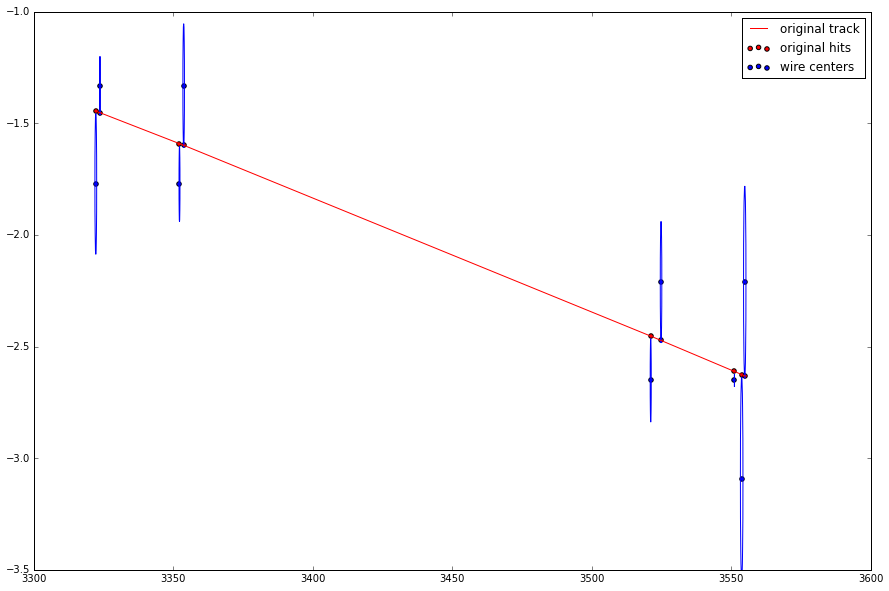

In [25]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)


plt.legend(loc='best')
plt.show()

### conventor_yz

In [26]:
hits = conventor_yz(event, 1)
hits

{3321.1500000000001: [<Y_views.ParametresYZ instance at 0x108ff3518>],
 3322.25: [<Y_views.ParametresYZ instance at 0x105eb4248>,
  <Y_views.ParametresYZ instance at 0x109354a70>],
 3323.75: [<Y_views.ParametresYZ instance at 0x108f813f8>,
  <Y_views.ParametresYZ instance at 0x108f81050>],
 3351.1500000000001: [<Y_views.ParametresYZ instance at 0x10938dc20>],
 3352.25: [<Y_views.ParametresYZ instance at 0x1083422d8>],
 3353.75: [<Y_views.ParametresYZ instance at 0x10933ab90>,
  <Y_views.ParametresYZ instance at 0x10933af38>],
 3354.8499999999999: [<Y_views.ParametresYZ instance at 0x109050710>],
 3521.1500000000001: [<Y_views.ParametresYZ instance at 0x109050ea8>],
 3522.25: [<Y_views.ParametresYZ instance at 0x1084ab320>],
 3523.75: [<Y_views.ParametresYZ instance at 0x109312680>],
 3524.8499999999999: [<Y_views.ParametresYZ instance at 0x108499758>,
  <Y_views.ParametresYZ instance at 0x1093aa1b8>],
 3551.1500000000001: [<Y_views.ParametresYZ instance at 0x109062440>,
  <Y_views.Para

### points_crossing_line_yz

In [27]:
z1 = track.Wz.min()
z2 = track.Wz.max()
y1 = track.Wy.min()
y2 = track.Wy.max()

plane_k = (y2 - y1) / (z2 - z1)
plane_b = y1 - plane_k * z1
plane_width = 0.85
n_min = 7



_, crossing_points, lin_regr = points_crossing_line_yz(plane_k, plane_b, plane_width, hits, n_min)

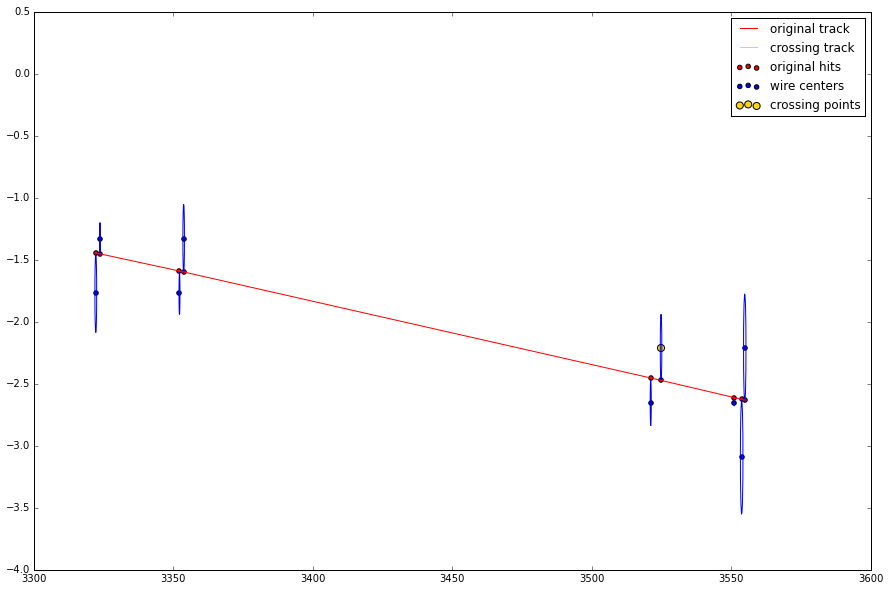

In [28]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# crossing point
Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

### loop_yz

In [29]:
tracks, linking_table = loop_yz(event, 7, 0.87, 1)

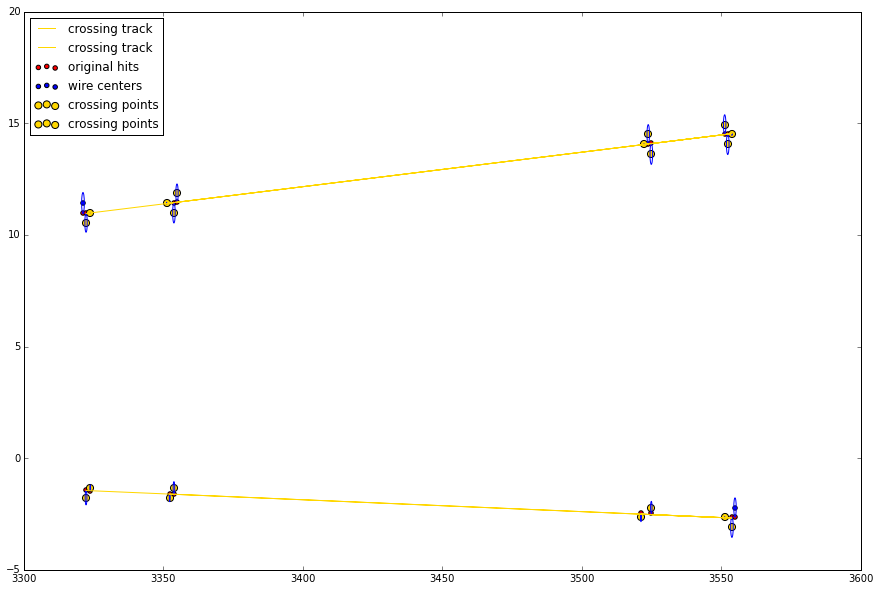

In [30]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = event.Wz.values
Wy = event.Wy.values
Z = event.Z.values
Y = event.Y.values
R = event.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# loop_yz
for key in linking_table:
    
    crossing_points = linking_table[key]
    lin_regr = tracks[key
                     ]
    Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
    Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
    Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Stereo-view pattern recognition. 1&2 stations.

### modify_for_xz_analysis_1_2

In [31]:
from UV_views import *
event_id = 2
event2 = all_hits[all_hits['event'] == event_id]

event2 = modify_for_xz_analysis_3_4(event2)
event2

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wx2,Wy1,Wy2,Wz,X,Y,Z,dist2Wire,event,k
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,248.512789,-15.663733,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20
100,100,1,0,3,290,408.937164,2,1,-8.8114,-250,...,249.816639,-30.566806,13.011066,3332.3793,81.984741,-1.493074,3332.250977,0.167169,2,59
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,248.551137,-16.102059,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21
101,101,0,1,3,289,408.989105,2,1,-8.3714,-250,...,249.778290,-30.128480,13.449391,3333.8793,82.001945,-1.500333,3333.748291,0.281569,2,60
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,248.474440,-15.225407,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,250.428228,37.557303,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23
102,102,1,0,3,282,409.274353,2,2,5.2686,-250,...,249.507863,27.037487,-16.540384,3342.3793,82.099594,-1.541715,3342.251221,0.339606,2,61
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,250.466576,37.995629,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24
103,103,0,1,3,281,409.320129,2,2,5.7086,-250,...,249.546212,27.475813,-16.102059,3343.8793,82.116806,-1.549026,3343.749512,0.106181,2,62
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,248.206001,-12.157128,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31


In [32]:
track2 = event2[event2.TrackID == 3]
track2

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wx2,Wy1,Wy2,Wz,X,Y,Z,dist2Wire,event,k
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,248.512789,-15.663733,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,248.551137,-16.102059,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,248.474440,-15.225407,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,250.428228,37.557303,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,250.466576,37.995629,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,248.206001,-12.157128,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31
73,73,0,1,4,279,415.659607,3,1,9.2286,-250,...,248.244349,-12.595453,30.982418,3533.8793,55.581013,14.244566,3533.748291,0.106172,2,32
74,74,1,0,4,274,415.944336,3,2,19.3486,-250,...,250.735016,41.063908,-2.513963,3542.3793,55.502087,14.380896,3542.252930,0.196525,2,33
75,75,1,1,4,274,416.032471,3,2,18.9086,-250,...,250.696668,40.625583,-2.952289,3544.9793,55.478035,14.422523,3544.845703,0.282903,2,34


### get_xz

In [33]:
[plane_k, plane_b] = np.polyfit(track2.Z.values, track2.Y.values, 1)

int_hits = get_xz(plane_k, plane_b, track2)
int_hits

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wy2,Wz,X,Y,Z,dist2Wire,event,k,Wy,Wx
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20,11.109923,56.439727
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21,11.150206,61.948597
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22,11.167249,52.046529
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23,11.281900,52.660110
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24,11.305140,57.442908
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31,14.208609,51.470402
73,73,0,1,4,279,415.659607,3,1,9.2286,-250,...,30.982418,3533.8793,55.581013,14.244566,3533.748291,0.106172,2,32,14.248892,56.979272
74,74,1,0,4,274,415.944336,3,2,19.3486,-250,...,-2.513963,3542.3793,55.502087,14.380896,3542.252930,0.196525,2,33,14.380586,57.629435
75,75,1,1,4,274,416.032471,3,2,18.9086,-250,...,-2.952289,3544.9793,55.478035,14.422523,3544.845703,0.282903,2,34,14.420869,52.120566


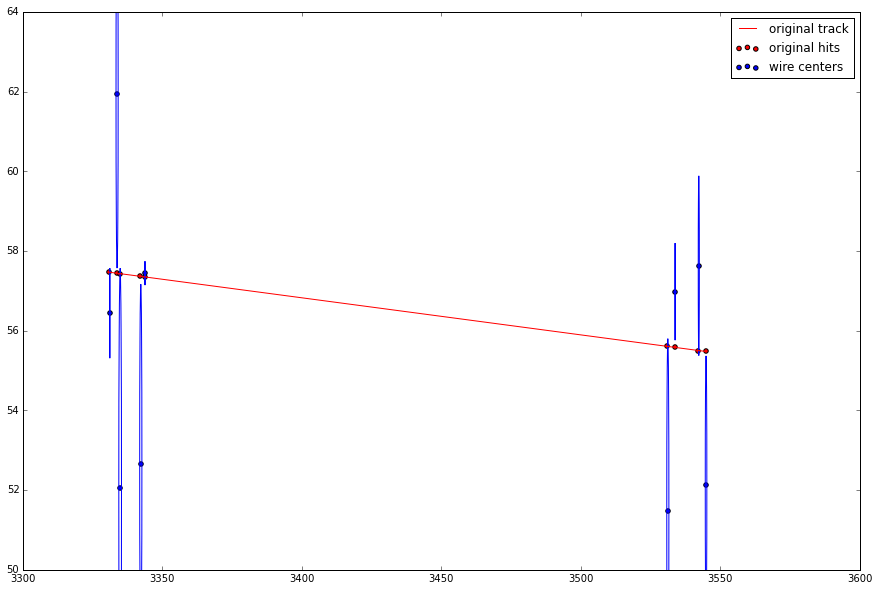

In [34]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

### conventor_xz

In [36]:
hits2 = conventor_xz(track2, 1)
hits2

{3331.2793000000001: {61: <UV_views.parametresXZ instance at 0x1051ac200>},
 3333.8793000000001: {62: <UV_views.parametresXZ instance at 0x109085998>},
 3334.9793: {63: <UV_views.parametresXZ instance at 0x1084f2cb0>},
 3342.3793000000001: {64: <UV_views.parametresXZ instance at 0x1084f2b00>},
 3343.8793000000001: {65: <UV_views.parametresXZ instance at 0x1084f2a28>},
 3531.2793000000001: {72: <UV_views.parametresXZ instance at 0x105eb4cf8>},
 3533.8793000000001: {73: <UV_views.parametresXZ instance at 0x105eb4200>},
 3542.3793000000001: {74: <UV_views.parametresXZ instance at 0x1084e5320>},
 3544.9793: {75: <UV_views.parametresXZ instance at 0x109002710>}}

### points_crossing_line_xz

In [37]:
intersecting_hits = {}
tmp = {}

k = plane_k
b = plane_b

hits_xz = get_xz(k, b, track2)

# TODO: the loop optimization
for z in hits2:

    y = k * z + b

    for hit_index in hits2[z]:

        x = hits_xz.loc[[hit_index]].Wx.values[0]

        if ((x > -250) & (x < 250) & (not hits2[z][hit_index].used)):

            hits2[z][hit_index].x = x
            tmp[hit_index] = x
            intersecting_hits.setdefault(z, []).append(hit_index)

In [38]:
[k, b] = np.polyfit(track2.Z.values, track2.X.values, 1)

_, crossing_points2, lin_regr2 = points_crossing_line_xz(k, b, 15, hits2, intersecting_hits, 6)

crossing_points2, lin_regr2

([62, 61, 64, 63, 72, 65, 73, 74, 75],
 array([ -7.88998838e-03,   8.24506907e+01]))

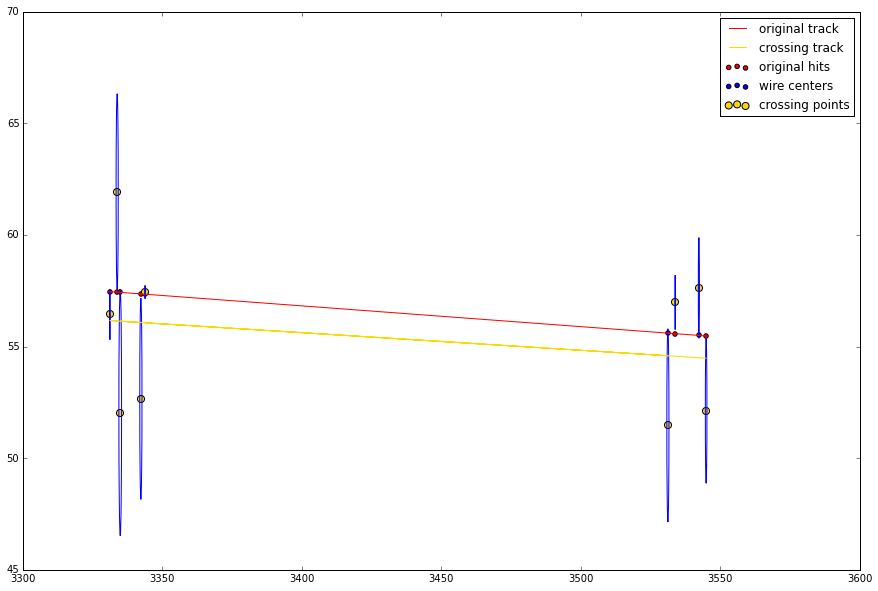

In [39]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# crossing point
Z_crossing = np.array([int_hits.loc[i].Wz for i in crossing_points2])
X_crossing = np.array([int_hits.loc[i].Wx for i in crossing_points2])
X_line_crossing = Z_crossing * lin_regr2[0] + lin_regr2[1]

plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')


plt.legend(loc='best')
plt.show()

### loop_xz

In [42]:
new_tracks, new_linking_table, x_coordinates = loop_xz(event2, tracks, linking_table, 6, 15, 1)

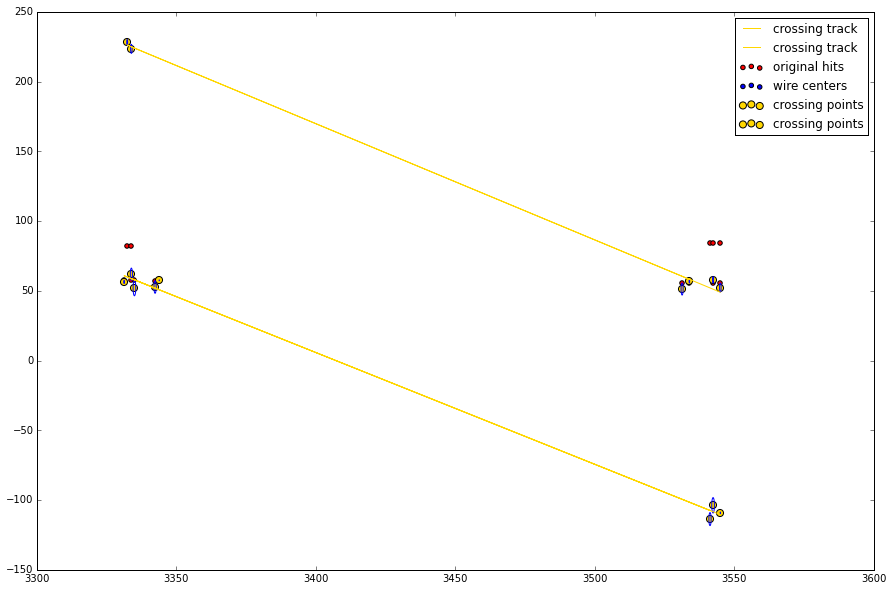

In [43]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[1]]
Wx = [x_coordinates[i] for i in new_linking_table.values()[0]] + \
     [x_coordinates[i] for i in new_linking_table.values()[1]] 
Z = [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[1]]
X = [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[1]]

R = np.array([event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[1]]) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(len(Z),))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, len(Wz)):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# loop_yz
for key in new_linking_table:
    
    crossing_points = new_linking_table[key]
    lin_regr = new_tracks[key]
    Z_crossing = np.array([event2.loc[i].Wz for i in crossing_points])
    X_crossing = np.array([x_coordinates[i] for i in crossing_points])
    X_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

In [44]:
def loop_xz(event, tracks, linking_table, n_min, width, ind):
    """
    Gets tracks and linking_table received from previous stage Y-views analysis. Fetches only tracks which intersect 
    more than n_min hits in 2d-space (z, x). Every track may be rejected or give 1 and more tracks in 2d-space (z, x).
    
    Args:
        event: pd.DataFrame() with all hits of any event;
        n_min: minimal number of points intercepting track for recognition this track;
        plane_width: stereo window of finding line;
        tracks: all tracks recognized on previous stage;
        linking_table: table from previous stage.
    Returns:
        new_tracks: new dictionary, key in new_tracks = "key from 'tracks'" * 10000 + new key, for cases when one track from
            'tracks' contains 2 and more tracks in 3d-space;
        new_linking_table: links each track from new_tracks and his hits, represented by dictionary:
            key = id of track, value = array of indexes of his hits.
    """

    hits = conventor_xz(event, ind)

    new_linking_table = {}
    new_tracks = {}

    x_coordinates = {}
    tmp = {}
    new_trackID = 1


    if (ind):

        start_zs = [3331.2793, 3332.3793]
        end_zs = [3544.9793, 3543.8793]

    else:

        start_zs = [2591.2793, 2592.3793]
        end_zs = [2803.8793, 2804.9793]


    if (ind):

        event = modify_for_xz_analysis_3_4(event)

    else:

        event = modify_for_xz_analysis_1_2(event)


    hh = []
    for track_id in tracks:

        intersecting_hits = {}
        n = 0

        k = tracks[track_id][0]
        b = tracks[track_id][1]

        hits_xz = get_xz(k, b, event)
        hh.append(hits_xz.copy())

        # TODO: the loop optimization
        for z in hits:

            y = k * z + b

            for hit_index in hits[z]:

                x = hits_xz.loc[[hit_index]].Wx.values[0]

                if ((x > -250) & (x < 250) & (not hits[z][hit_index].used)):

                    hits[z][hit_index].x = x
                    tmp[hit_index] = x
                    intersecting_hits.setdefault(z, []).append(hit_index)
                    n += 1

        if (n >= n_min):

            for start_z in (set(start_zs) & set(intersecting_hits)):

                for i in intersecting_hits[start_z]:

                    for end_z in (set(end_zs) & set(intersecting_hits)):

                        for j in intersecting_hits[end_z]:

                            if ((not hits[start_z][i].used) & (not hits[end_z][j].used)):

                                new_k, new_b = get_plane((hits[start_z][i].x, start_z), (hits[end_z][j].x, end_z))

                                indicator, crossing_points, lin_regr = \
                                    points_crossing_line_xz(new_k, new_b, width, hits, intersecting_hits, n_min)

                                if indicator == 1:

                                    new_tracks[track_id * 10000 + new_trackID] = lin_regr
                                    new_linking_table[track_id * 10000 + new_trackID] = crossing_points

                                    for k in crossing_points:
                                        x_coordinates[k] = tmp[k]

                                    new_trackID += 1


    return new_tracks, new_linking_table, x_coordinates, hh

new_tracks, new_linking_table, x_coordinates, hh = loop_xz(event2, tracks, linking_table, 9, 15, 1)

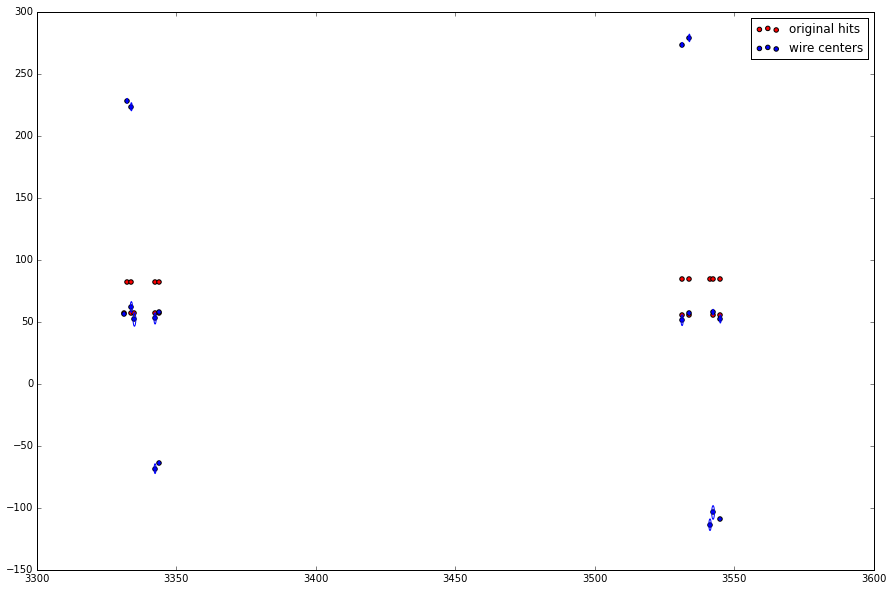

In [45]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = hh[0].Wz.values
Wx = hh[0].Wx.values
Z = event2.Z.values
X = event2.X.values
R = (hh[0].dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Wz.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Wz.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()